In [1]:
import cv2 
import matplotlib.pyplot as plt 

image_1 = cv2.imread('./data/000000-0.png')
image_2 = cv2.imread('./data/000000-1.png')
gray_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
gray_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

In [7]:
orb = cv2.ORB_create()
keypoints_1, descriptors_1 = orb.detectAndCompute(gray_1, None)
keypoints_2, descriptors_2 = orb.detectAndCompute(gray_2, None)

matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = matcher.match(descriptors_1, descriptors_2)

res = cv2.drawMatches(image_1, keypoints_1, image_2, keypoints_2, matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

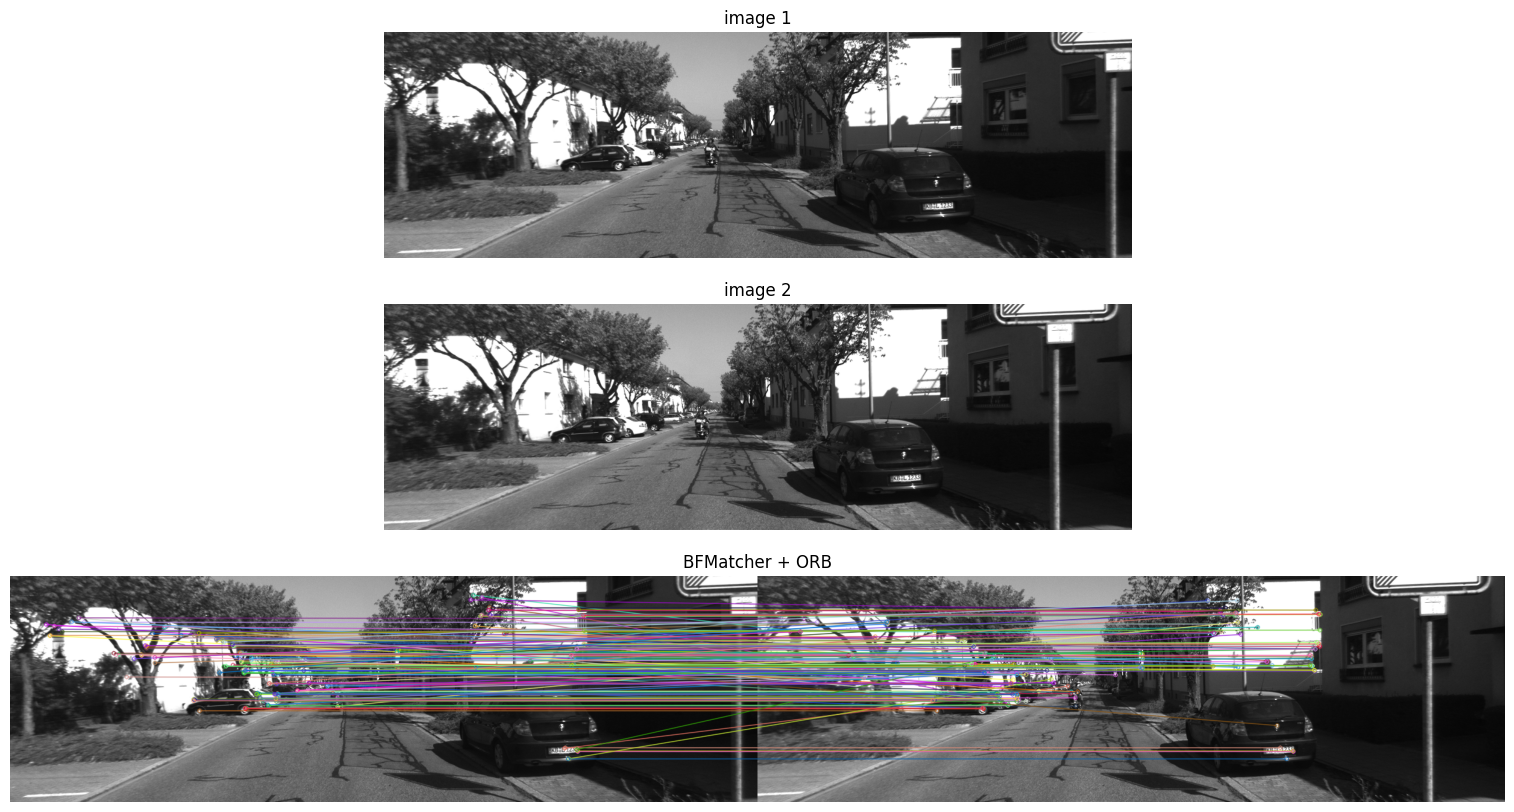

In [8]:
titles = ['image 1', 'image 2', 'BFMatcher + ORB']
images = [image_1, image_2, res]

plt.figure(figsize=(20, 10))
for i in range(len(titles)):
    plt.subplot(3, 1, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.show()